In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
# stats
from scipy import stats
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
# evaluation
from sklearn.metrics import silhouette_score
# distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

In [13]:
df = pd.read_csv("../../our_analyses/dataset_prepared.csv")

In [14]:
from sklearn.preprocessing import LabelEncoder

# df = df[~((df['tempo'] == 0) & (~df['genre'].isin([16])))]

# # # Filtro per rimuovere le righe con acousticness e energy > 0.8 e non appartenenti ai genre_group 1 e 2
# df = df[~((df['acousticness'] > 0.8) & (df['energy'] > 0.8) & (~df['genre'].isin([16])))]
# df = df[~((df['acousticness'] < 0.3) & (df['energy'] < 0.3) & (~df['genre'].isin([16,12,18])))]

# Il DataFrame 'df' ora contiene solo le righe che soddisfano le tue condizioni

# Calcola i quantili per 'popularity'
# Q1 = df['popularity'].quantile(0.2)
# Q2 = df['popularity'].quantile(0.4)
# Q3 = df['popularity'].quantile(0.60)
# Q4 = df['popularity'].quantile(0.80)

# # Definisci gli intervalli di bin
# bin_edges = [-1, Q1, Q2, Q3, Q4, df['popularity'].max()]
# bin_labels = ['Very Low Popularity', 'Low Popularity', 'Medium Popularity', 'High Popularity', 'Very High Popularity']


# # Crea la colonna 'popularity_category' con i valori discretizzati
# df['popularity_category'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels)
# df=df.drop(["popularity"], axis=1)

# le = LabelEncoder()
# df['popularity_category'] = le.fit_transform(df['popularity_category'])

In [15]:
df['genre'].unique()

array(['afrobeat', 'black-metal', 'bluegrass', 'brazil', 'breakbeat',
       'chicago-house', 'disney', 'forro', 'happy', 'idm', 'indian',
       'industrial', 'iranian', 'j-dance', 'j-idol', 'mandopop', 'sleep',
       'spanish', 'study', 'techno'], dtype=object)

In [16]:
df['explicit'] = df['explicit'].apply(lambda x: 1 if x else 0)
# df['genre'] = pd.factorize(df['genre'])[0]
y = np.array(df["genre"])
df = df.drop(['name', 'artists', 'album_name', 'genre'], axis=1)
X = df.values

In [17]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats
0,293106,0,50,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,654.0
1,194972,0,52,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,537.0
2,178428,0,22,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,304.0
3,238373,0,20,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,427.0
4,221893,0,22,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,317.0


In [18]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_minmax

array([[0.06919813, 0.        , 0.53191489, ..., 0.61648793, 0.8       ,
        0.08900381],
       [0.04533095, 0.        , 0.55319149, ..., 0.75587348, 0.8       ,
        0.07308111],
       [0.04130728, 0.        , 0.23404255, ..., 0.46620111, 0.8       ,
        0.0413718 ],
       ...,
       [0.05482417, 0.        , 0.57446809, ..., 0.54411518, 0.8       ,
        0.06273816],
       [0.06141224, 0.        , 0.59574468, ..., 0.58954314, 0.8       ,
        0.07702776],
       [0.07293383, 0.        , 0.45744681, ..., 0.5578007 , 0.8       ,
        0.09471965]])

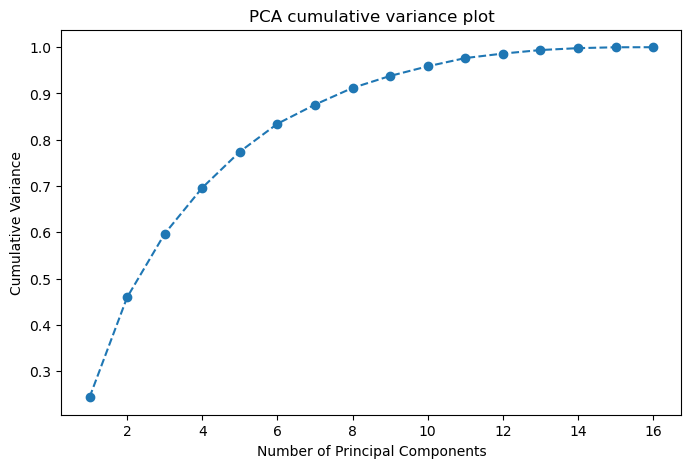

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_minmax)

# Calcolo della varianza cumulativa spiegata
varianza_cumulativa = pca.explained_variance_ratio_.cumsum()

# Grafico della varianza cumulativa spiegata
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_cumulativa)+1), varianza_cumulativa, marker='o', linestyle='--')
plt.title('PCA cumulative variance plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [20]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_minmax)

# K-means

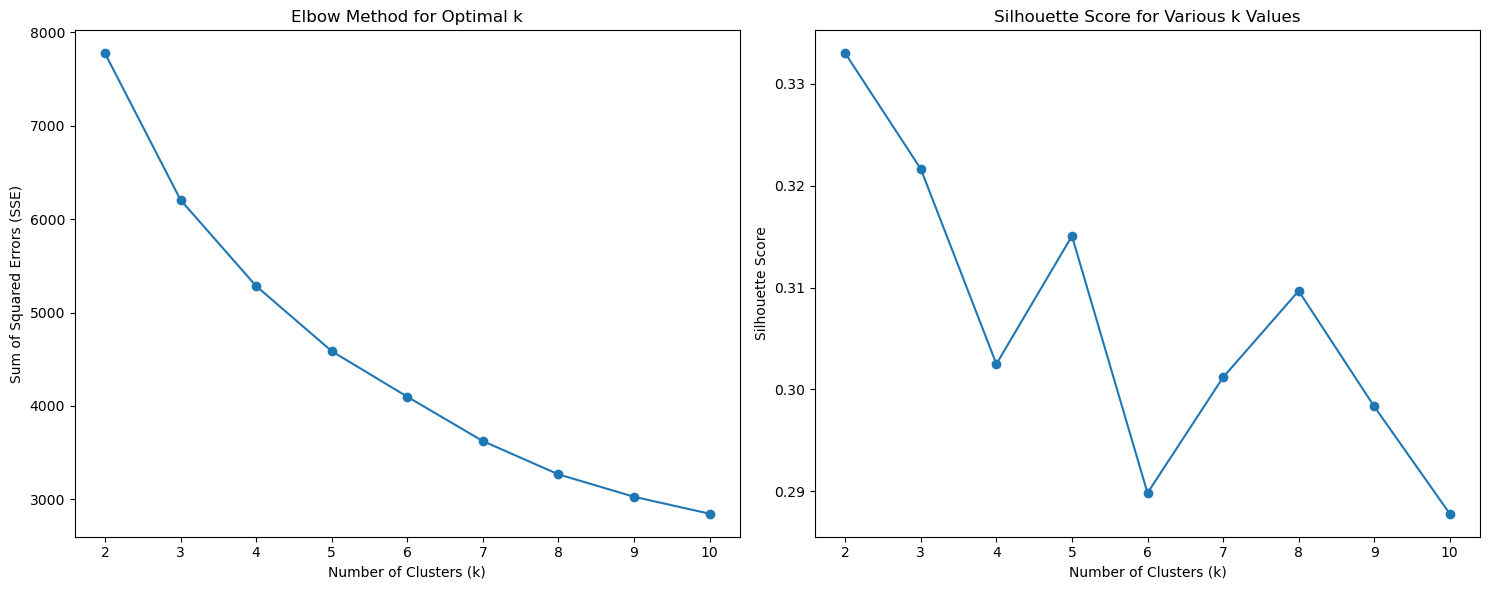

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assumiamo che X_pca sia già definito e contenga i dati trasformati dalla PCA

# Lista per memorizzare SSE e punteggi silhouette
sse_list = []
silhouette_scores = []

# Ciclo da k=2 a k=10 per calcolare SSE e punteggio silhouette
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_pca)
    sse_list.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Preparazione del subplot per i due grafici
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Grafico per SSE
ax[0].plot(range(2, 11), sse_list, marker='o')
ax[0].set_title('Elbow Method for Optimal k')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Sum of Squared Errors (SSE)')

# Grafico per il punteggio silhouette
ax[1].plot(range(2, 11), silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score for Various k Values')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')

# Mostra entrambi i grafici
plt.tight_layout()  # Ajusta automaticamente i subplot per evitare sovrapposizioni
plt.show()


In [22]:
# Lista per salvare i risultati di silhouette e SSE
silhouette_scores = []
sse_values = []

# Prova con un numero di cluster da 2 a 10
for num_clusters in range(2, 11):
    # Modello K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=4)
    kmeans.fit(X_pca)
    
    # Calcolo silhouette score
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calcolo SSE
    sse = kmeans.inertia_
    sse_values.append(sse)

# Stampa i risultati
print("Numero di Cluster | Silhouette Score | SSE")
print("-----------------------------------------")
for num_clusters, silhouette, sse in zip(range(2, 11), silhouette_scores, sse_values):
    print(f"{num_clusters:^18} | {silhouette:^16.4f} | {sse:^8.2f}")

/Users/francescocapria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/francescocapria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/francescocapria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/francescocapria/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

Numero di Cluster | Silhouette Score | SSE
-----------------------------------------
        2          |      0.3330      | 7775.87 
        3          |      0.3215      | 6205.69 
        4          |      0.3025      | 5283.79 
        5          |      0.3151      | 4586.29 
        6          |      0.3021      | 4028.21 
        7          |      0.3018      | 3623.18 
        8          |      0.3097      | 3267.03 
        9          |      0.2983      | 3026.84 
        10         |      0.2878      | 2845.31 


In [23]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=4)
kmeans.fit(X_pca)

KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=4)

In [24]:
# from sklearn.metrics import pairwise_distances
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.cluster import KMeans

# # Supponiamo che X_pca sia il tuo set di dati ridotto in dimensioni

# # Inizializza e adatta KMeans
# kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=4)
# kmeans.fit(X_pca)

# # Ottieni le etichette del cluster
# labels = kmeans.labels_

# # Crea la matrice di somiglianza
# similarity_matrix = np.zeros((len(labels), len(labels)))
# for i in range(len(labels)):
#     for j in range(len(labels)):
#         if labels[i] == labels[j]:
#             similarity_matrix[i, j] = 1

# # Calcola la matrice di distanza
# distance_matrix = pairwise_distances(X_pca)

# # Converti la matrice di distanza in una matrice di somiglianza (in modo che i valori più alti indicano maggiore vicinanza)
# max_distance = np.max(distance_matrix)
# similarity_matrix_from_distance = 1 - (distance_matrix / max_distance)

# # Calcola la correlazione
# # Trasforma le matrici in vettori unidimensionali
# upper_triangle_indices = np.triu_indices_from(similarity_matrix, k=1)
# similarity_vector = similarity_matrix[upper_triangle_indices]
# distance_vector = similarity_matrix_from_distance[upper_triangle_indices]

# # Calcola la correlazione di Pearson
# correlation = np.corrcoef(similarity_vector, distance_vector)[0, 1]

# print(f"Correlazione tra la matrice di somiglianza dei cluster e la matrice di distanza: {correlation}")

# # Visualizza la matrice di somiglianza
# # plt.figure(figsize=(18, 18))
# # sns.heatmap(similarity_matrix, cmap='viridis')
# # plt.title('Matrice di Somiglianza per il Clustering KMeans')
# # plt.show()


In [25]:
print('SSE', kmeans.inertia_) 
print('Silhouette', silhouette_score(X_pca, kmeans.labels_))

SSE 4586.291009095364
Silhouette 0.31507742918663834


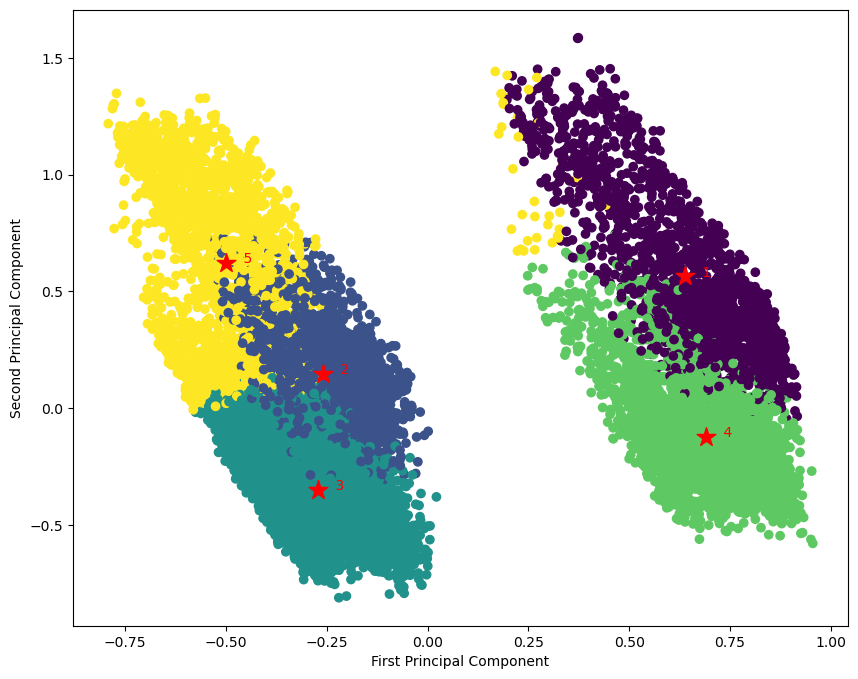

In [26]:
# Riproviamo con parametri che dovrebbero richiedere meno tempo di computazione
kmeans_quick = KMeans(n_clusters=5, n_init=1, max_iter=10, random_state=4)
kmeans_quick.fit(X_pca)

# Estraiamo nuovamente i centroidi dei cluster
centers_quick = kmeans_quick.cluster_centers_

# Verifichiamo il numero di cluster unici e il numero di centroidi
unique_labels_quick = np.unique(kmeans_quick.labels_)
unique_labels_quick, centers_quick.shape[0]

# Scatter Plot dei Cluster corretto
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_quick.labels_, cmap='viridis')
plt.scatter(centers_quick[:, 0], centers_quick[:, 1], c='red', marker='*', s=200)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Aggiungiamo una legenda per i centroidi
for i, c in enumerate(centers_quick):
    plt.text(c[0], c[1], f'    {i+1}', color='red')

# Mostra il grafico
plt.show()

In [27]:


plt.figure(figsize=(20, 6))

unique_labels = np.unique(kmeans.labels_)

scatter_plot = sns.scatterplot(data=df, 
                               x="instrumentalness",
                               y="acousticness", 
                               hue='kmeans_labels', 
                               palette="bright",
                               alpha=0.6,          # Impostiamo una trasparenza
                               s=50)               # Dimensione dei punti

# Aggiungiamo legenda e titolo
plt.legend(title='Cluster')
plt.title('Scatter Plot of Instrumentalness vs Acousticness')
plt.show()

# Stampiamo il numero di etichette uniche per confermare il numero di cluster
unique_labels, len(unique_labels)

ValueError: Could not interpret value `kmeans_labels` for parameter `hue`

<Figure size 2000x600 with 0 Axes>

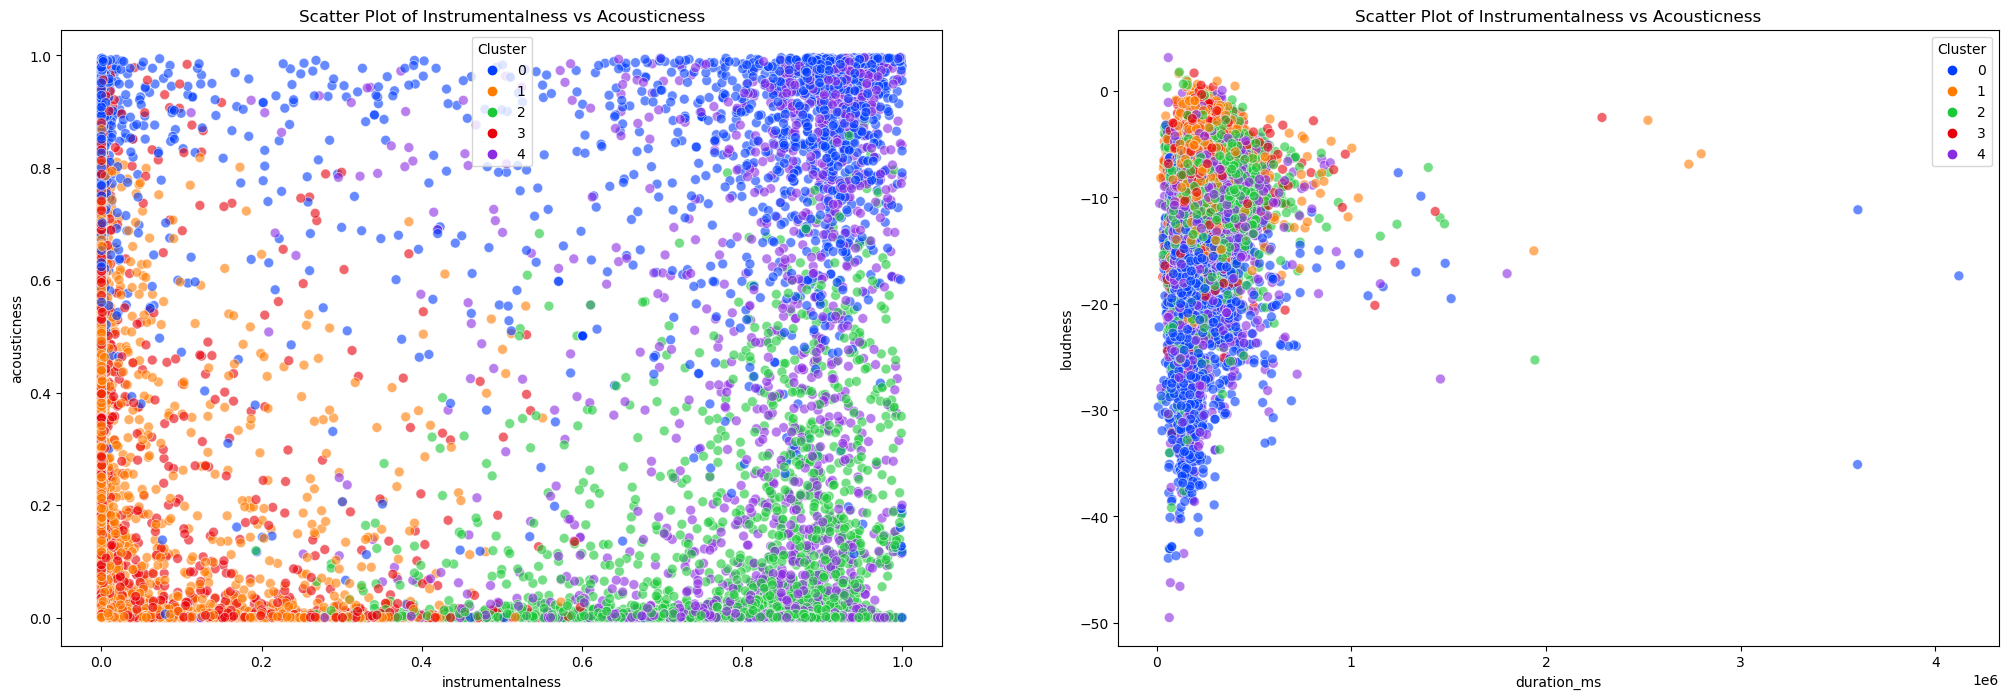

[0 1 2 3 4] 5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans  # O BisectingKMeans, se disponibile
from sklearn.decomposition import PCA

# Assumo che tu abbia già eseguito la PCA sui tuoi dati e li abbia salvati in X_pca

# Primo Plot: KMeans con parametri rapidi
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=42)
kmeans.fit(X_pca)

centers = kmeans.cluster_centers_
unique_labels = np.unique(kmeans.labels_)

# Impostiamo un layout con due colonne
plt.figure(figsize=(25, 8))

# Secondo Plot: Scatterplot con seaborn
plt.subplot(1, 2, 1)
scatter_plot = sns.scatterplot(data=df, 
                               x="instrumentalness",
                               y="acousticness", 
                               hue=kmeans.labels_, 
                               palette="bright",
                               alpha=0.6,
                               s=50)
plt.legend(title='Cluster')
plt.title('Scatter Plot of Instrumentalness vs Acousticness')

# Mostra il grafico

# Secondo Plot: Scatterplot con seaborn
plt.subplot(1, 2, 2)
scatter_plot = sns.scatterplot(data=df, 
                               x="duration_ms",
                               y="loudness", 
                               hue=kmeans.labels_, 
                               palette="bright",
                               alpha=0.6,
                               s=50)
plt.legend(title='Cluster')
plt.title('Scatter Plot of Instrumentalness vs Acousticness')

# Mostra il grafico
plt.show()

# Stampa il numero di etichette uniche per confermare il numero di cluster
print(unique_labels, len(unique_labels))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


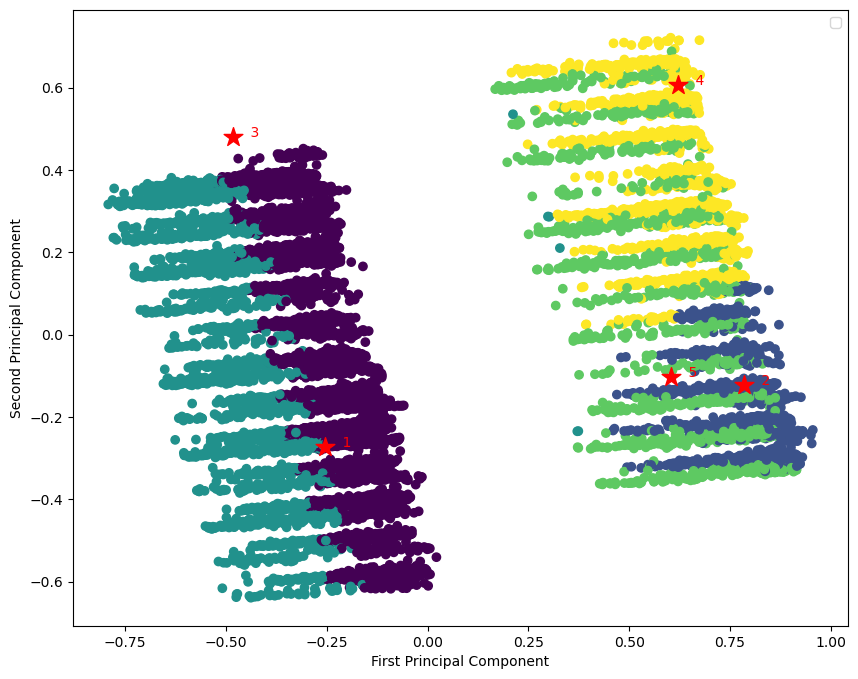

In [ ]:
# Riproviamo con parametri che dovrebbero richiedere meno tempo di computazione
kmeans_quick = KMeans(n_clusters=5, n_init=1, max_iter=10, random_state=4)
kmeans_quick.fit(X_pca)

# Estraiamo nuovamente i centroidi dei cluster
centers_quick = kmeans_quick.cluster_centers_

# Verifichiamo il numero di cluster unici e il numero di centroidi
unique_labels_quick = np.unique(kmeans_quick.labels_)
unique_labels_quick, centers_quick.shape[0]

# Scatter Plot dei Cluster corretto
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 3], c=kmeans_quick.labels_, cmap='viridis')
plt.scatter(centers_quick[:, 0], centers_quick[:, 1], c='red', marker='*', s=200)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Aggiungiamo una legenda per i centroidi
for i, c in enumerate(centers_quick):
    plt.text(c[0], c[1], f'    {i+1}', color='red')

plt.legend()
# Mostra il grafico
plt.show()

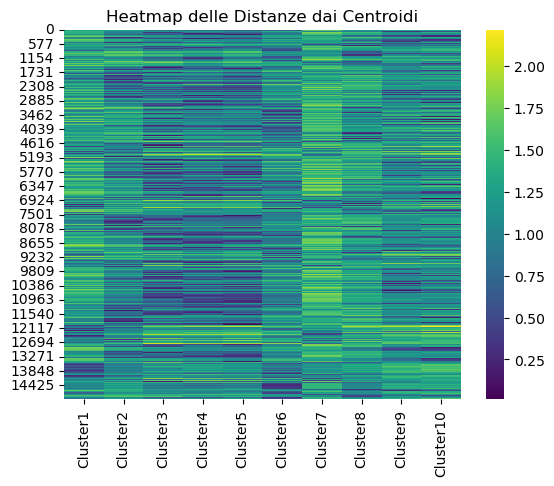

In [ ]:
import seaborn as sns

# Calcolo delle distanze dai centroidi
distances = kmeans.transform(X_pca)
distance_df = pd.DataFrame(distances, columns=[f'Cluster{i+1}' for i in range(kmeans.n_clusters)])

# Visualizzazione Heatmap
sns.heatmap(distance_df, cmap='viridis')
plt.title('Heatmap delle Distanze dai Centroidi')
plt.show()


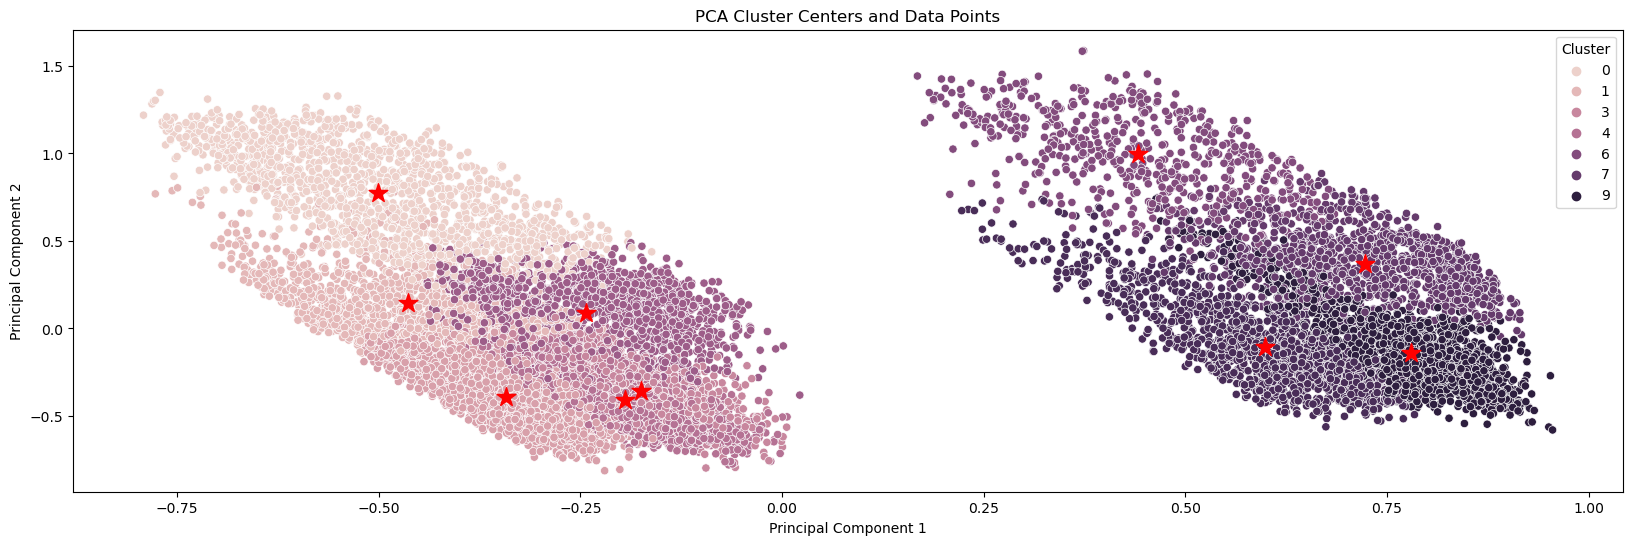

In [ ]:
df['kmeans_labels'] = kmeans.labels_
df['kmeans_labels'] = df['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3: "D", 4: "E"})

# Calcolare i centroidi nel contesto PCA
centers_pca = kmeans.cluster_centers_

# Invertire la trasformazione PCA
centers_original_space = pca.inverse_transform(centers_pca)

# Invertire la normalizzazione MinMax
centers = scaler.inverse_transform(centers_original_space)

plt.figure(figsize=(20, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='*', s=200)
plt.title('PCA Cluster Centers and Data Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()



In [ ]:
# import plotly.express as px
# import pandas as pd

# # Assumendo che 'X_pca' sia un array numpy con le prime due componenti principali che vuoi visualizzare
# # e 'kmeans.labels_' sia l'array con le etichette dei cluster da KMeans

# # Converti 'X_pca' in un DataFrame e aggiungi le etichette di clustering e di genere
# pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
# pca_df['kmeans_labels'] = kmeans.labels_
# pca_df['genre'] = y  # Assumendo che 'y' sia un array o una serie con le etichette di genere

# # Utilizziamo ora Plotly per creare un grafico interattivo
# fig = px.scatter(pca_df, x='PC1', y='PC2', color='kmeans_labels', symbol='genre',
#                  title="Clusters and Genres based on PCA Components")

# # Mostra il grafico
# fig.show()

# df['kmeans_labels'] = kmeans.labels_

# # Assicurati che 'y' sia nel DataFrame come una colonna di stringhe
# df['genre'] = pd.Series(y).astype(str)

# # Ora che hai sia 'bkmeans_labels' che 'genre' nel DataFrame, puoi creare il countplot
# plt.figure(figsize=(20, 8))
# sns.countplot(data=df, x='kmeans_labels', hue='genre')
# plt.title('Count of Genres in each Cluster')
# plt.xlabel('Cluster Labels')
# plt.ylabel('Count')
# plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assumiamo che X_minmax e y siano già definiti e che y contenga i generi musicali

# Eseguire KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=4)
kmeans.fit(X_pca)

# Assegnare ogni punto ai suoi rispettivi cluster
cluster_labels = kmeans.labels_

# Creare una nuova colonna nel DataFrame originale per i cluster
df['cluster'] = cluster_labels

# Recuperare la colonna 'genre' che era stata trasformata in y
df['genre'] = y

# Calcolare la frequenza di ogni genere in ciascun cluster
cluster_genre_counts = df.groupby(['cluster', 'genre']).size().unstack(fill_value=0)

# Calcolare la dimensione di ogni cluster
cluster_sizes = df['cluster'].value_counts()

# Calcolare le proporzioni relative di ogni genere all'interno dei cluster
cluster_genre_proportions = cluster_genre_counts.div(cluster_sizes, axis=0)

# Determinare il cluster dominante per ogni genere basandosi sulle proporzioni
dominant_cluster_per_genre = cluster_genre_proportions.idxmax(axis=0)

print(dominant_cluster_per_genre)


NameError: name 'X_pca' is not defined

# Bisecting k-means

In [ ]:
from sklearn.cluster import BisectingKMeans

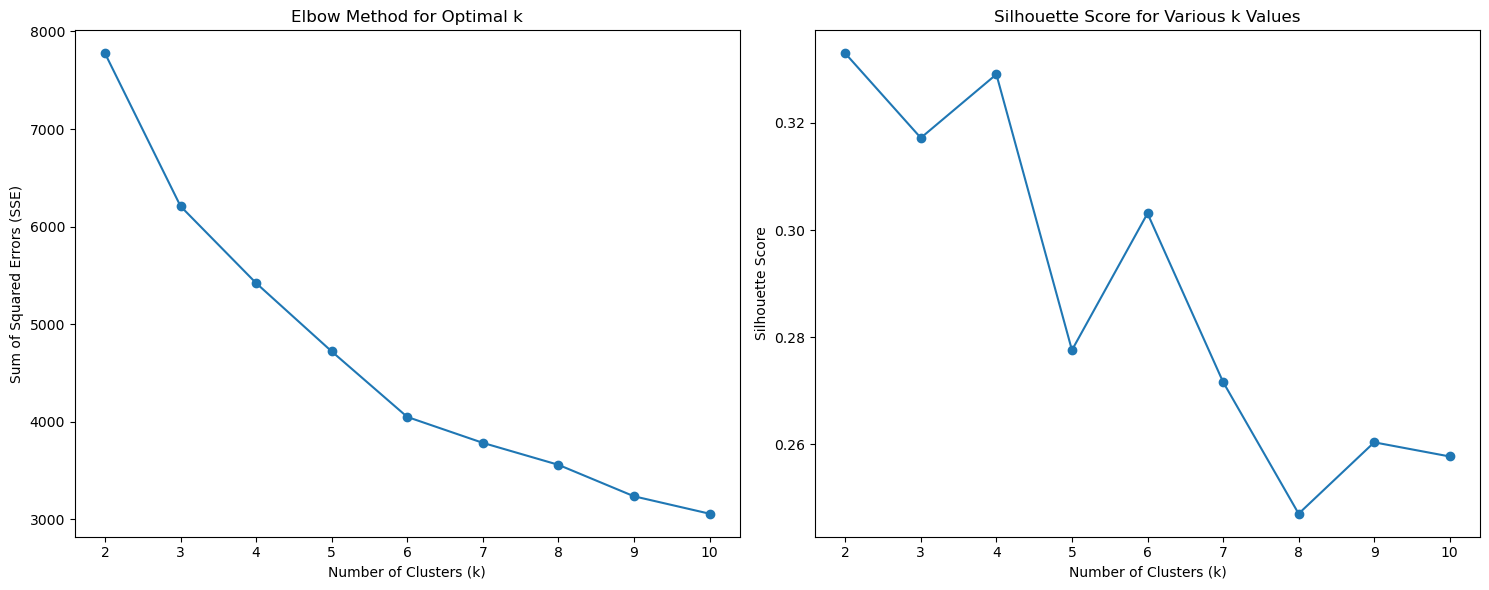

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assumiamo che X_pca sia già definito e contenga i dati trasformati dalla PCA

# Lista per memorizzare SSE e punteggi silhouette
sse_list = []
silhouette_scores = []

# Ciclo da k=2 a k=10 per calcolare SSE e punteggio silhouette
for k in range(2, 11):
    kmeans = BisectingKMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse_list.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Preparazione del subplot per i due grafici
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Grafico per SSE
ax[0].plot(range(2, 11), sse_list, marker='o')
ax[0].set_title('Elbow Method for Optimal k')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Sum of Squared Errors (SSE)')

# Grafico per il punteggio silhouette
ax[1].plot(range(2, 11), silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score for Various k Values')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')

# Mostra entrambi i grafici
plt.tight_layout()  # Ajusta automaticamente i subplot per evitare sovrapposizioni
plt.show()


In [ ]:
# Lista per salvare i risultati di silhouette e SSE
silhouette_scores = []
sse_values = []

# Prova con un numero di cluster da 2 a 10
for num_clusters in range(2, 11):
    # Modello K-Means
    kmeans = BisectingKMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_pca)
    
    # Calcolo silhouette score
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calcolo SSE
    sse = kmeans.inertia_
    sse_values.append(sse)

# Stampa i risultati
print("Numero di Cluster | Silhouette Score | SSE")
print("-----------------------------------------")
for num_clusters, silhouette, sse in zip(range(2, 11), silhouette_scores, sse_values):
    print(f"{num_clusters:^18} | {silhouette:^16.4f} | {sse:^8.2f}")

KeyboardInterrupt: 

In [ ]:
bkmeans = BisectingKMeans(n_clusters=6, n_init=10, max_iter=100,  random_state=42)
bkmeans.fit(X_pca)

BisectingKMeans(max_iter=100, n_clusters=6, n_init=10, random_state=42)

In [ ]:
print('SSE', bkmeans.inertia_) 
print('Silhouette', silhouette_score(X_pca, bkmeans.labels_))

SSE 4050.6206280730935
Silhouette 0.30288951759860566


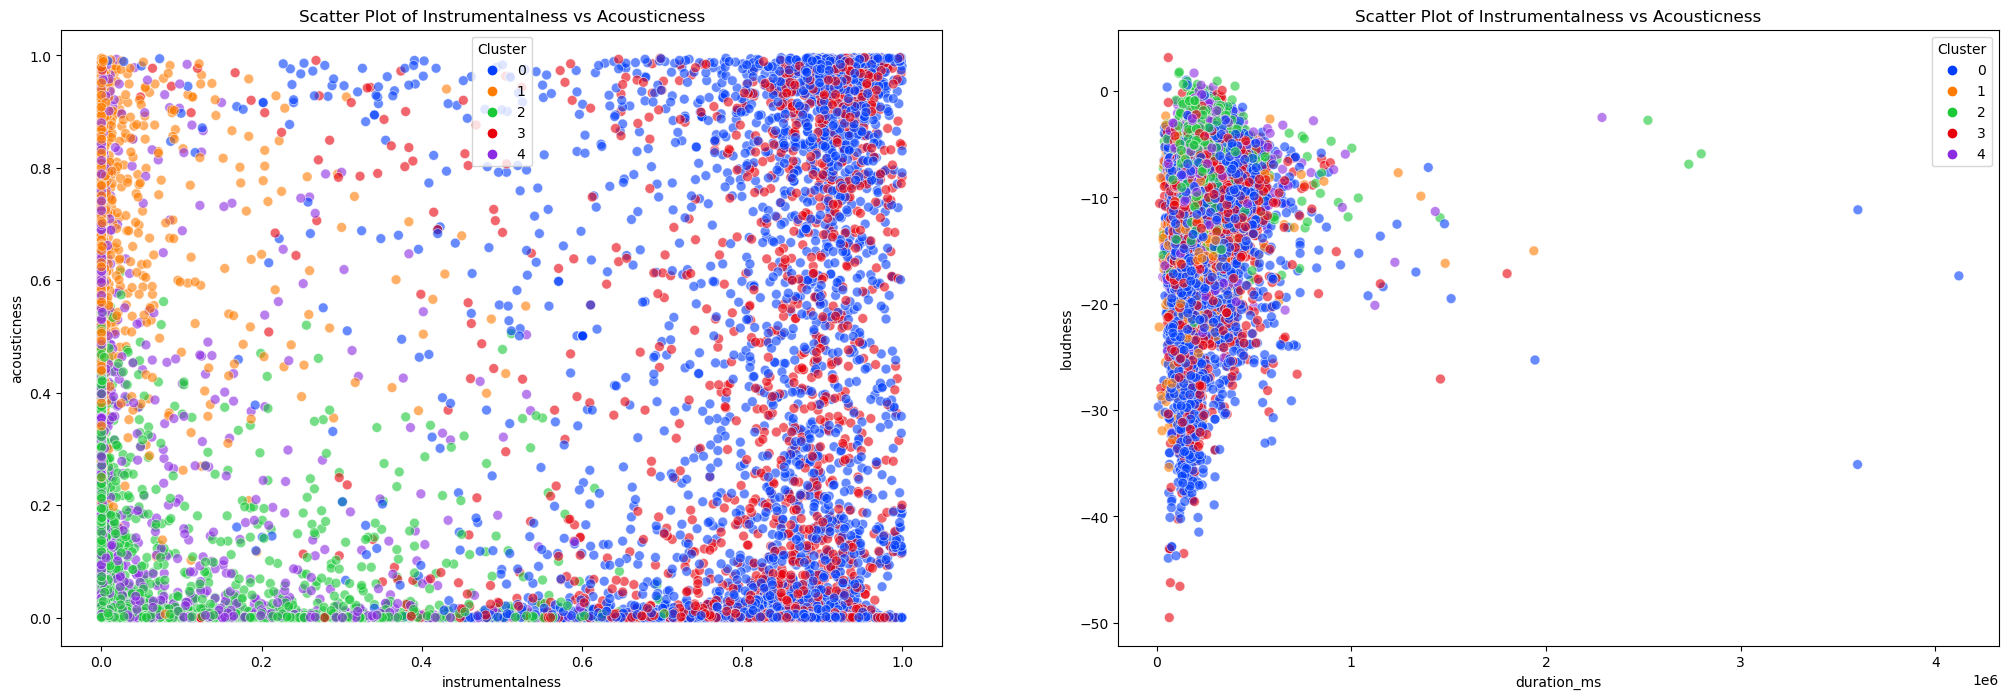

[0 1 2 3 4] 5


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans  # O BisectingKMeans, se disponibile
from sklearn.decomposition import PCA

# Assumo che tu abbia già eseguito la PCA sui tuoi dati e li abbia salvati in X_pca

# Primo Plot: KMeans con parametri rapidi
kmeans = BisectingKMeans(n_clusters=5, n_init=10, max_iter=100, random_state=42)
kmeans.fit(X_pca)

centers = kmeans.cluster_centers_
unique_labels = np.unique(kmeans.labels_)

# Impostiamo un layout con due colonne
plt.figure(figsize=(25, 8))

# Secondo Plot: Scatterplot con seaborn
plt.subplot(1, 2, 1)
scatter_plot = sns.scatterplot(data=df, 
                               x="instrumentalness",
                               y="acousticness", 
                               hue=kmeans.labels_, 
                               palette="bright",
                               alpha=0.6,
                               s=50)
plt.legend(title='Cluster')
plt.title('Scatter Plot of Instrumentalness vs Acousticness')

# Mostra il grafico

# Secondo Plot: Scatterplot con seaborn
plt.subplot(1, 2, 2)
scatter_plot = sns.scatterplot(data=df, 
                               x="duration_ms",
                               y="loudness", 
                               hue=kmeans.labels_, 
                               palette="bright",
                               alpha=0.6,
                               s=50)
plt.legend(title='Cluster')
plt.title('Scatter Plot of Instrumentalness vs Acousticness')

# Mostra il grafico
plt.show()
# Stampa il numero di etichette uniche per confermare il numero di cluster
print(unique_labels, len(unique_labels))


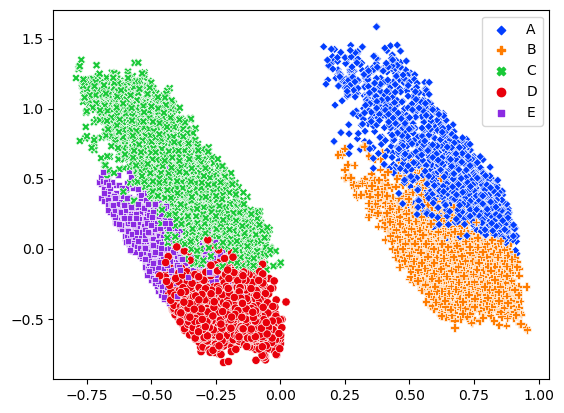

In [ ]:
df['bkmeans_labels'] = bkmeans.labels_
# Mappa tutte e 5 le etichette dei cluster a lettere
df['bkmeans_labels'] = df['bkmeans_labels'].map({0: "A", 1: "B", 2: "C", 3: "D", 4: "E"})

# Ora usa le componenti principali per il plot
sns.scatterplot(
    x=X_pca[:, 0],  # Prima componente principale
    y=X_pca[:, 1],  # Seconda componente principale
    hue=df['bkmeans_labels'], 
    style=df['bkmeans_labels'],
    palette="bright", 
    hue_order=["A", "B", "C", "D", "E"]
)
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Assumendo che 'X_pca' sia un array numpy con le prime due componenti principali che vuoi visualizzare
# e 'kmeans.labels_' sia l'array con le etichette dei cluster da KMeans

# Converti 'X_pca' in un DataFrame e aggiungi le etichette di clustering e di genere
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['bkmeans_labels'] = bkmeans.labels_
pca_df['genre'] = y  # Assumendo che 'y' sia un array o una serie con le etichette di genere

# Utilizziamo ora Plotly per creare un grafico interattivo
fig = px.scatter(pca_df, x='PC1', y='PC2', color='bkmeans_labels', symbol='genre',
                 title="Clusters and Genres based on PCA Components")

# Mostra il grafico
fig.show()

df['bkmeans_labels'] = bkmeans.labels_

# Assicurati che 'y' sia nel DataFrame come una colonna di stringhe
df['genre'] = pd.Series(y).astype(str)

# Ora che hai sia 'bkmeans_labels' che 'genre' nel DataFrame, puoi creare il countplot
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='bkmeans_labels', hue='genre')
plt.title('Count of Genres in each Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.show()


ValueError: Shape of passed values is (15000, 5), indices imply (15000, 3)

In [ ]:
print('SSE', bkmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, bkmeans.labels_))

SSE 2290.117880619552
Silhouette 0.179499477841404


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assumiamo che X_minmax e y siano già definiti e che y contenga i generi musicali

# Eseguire KMeans
kmeans = BisectingKMeans(n_clusters=5, n_init=10, max_iter=100, random_state=4)
kmeans.fit(X_minmax)

# Assegnare ogni punto ai suoi rispettivi cluster
cluster_labels = kmeans.labels_

# Creare una nuova colonna nel DataFrame originale per i cluster
df['cluster'] = cluster_labels

# Recuperare la colonna 'genre' che era stata trasformata in y
df['genre'] = y

# Calcolare la frequenza di ogni genere in ciascun cluster
cluster_genre_counts = df.groupby(['cluster', 'genre']).size().unstack(fill_value=0)

# Calcolare la dimensione di ogni cluster
cluster_sizes = df['cluster'].value_counts()

# Calcolare le proporzioni relative di ogni genere all'interno dei cluster
cluster_genre_proportions = cluster_genre_counts.div(cluster_sizes, axis=0)

# Determinare il cluster dominante per ogni genere basandosi sulle proporzioni
dominant_cluster_per_genre = cluster_genre_proportions.idxmax(axis=0)

print(dominant_cluster_per_genre)


genre
afrobeat         3
black-metal      4
bluegrass        1
brazil           1
breakbeat        2
chicago-house    4
disney           1
forro            2
happy            2
idm              4
indian           1
industrial       2
iranian          4
j-dance          3
j-idol           2
mandopop         1
sleep            0
spanish          2
study            4
techno           4
dtype: int32


# X-Means

In [ ]:
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
# Read sample 'simple3' from file.
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
initial_centers = kmeans_plusplus_initializer(X_pca, 2).initialize()

xmeans_instance = xmeans(X_pca, initial_centers, kmax=20)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()

# Optionally, get cluster centers
cluster_centers = xmeans_instance.get_centers()

AttributeError: module 'numpy' has no attribute 'warnings'